# 📊 Premier League Dataset – Exploratory Data Analysis

Now that the dataset is cleaned, this notebook explores key patterns, trends, and relationships in Premier League match data. We'll break down performance indicators, goal trends, and team consistency across seasons to inform future analysis and visual storytelling.

**Goals:**
- Understand team performance distributions
- Identify patterns in goal scoring and outcomes
- Explore home vs away dynamics

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
prem = pd.read_csv('../data/cleaned/cleanedprem.csv')
prem.head(1)

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,AwayTeamFouls,HomeTeamYellowCards,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards,HomeTeamPoints,AwayTeamPoints,year,month,day
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,0,3,1993,8,14


## ⚽ Overall Match Statistics

We’ll start with general stats: total number of matches, average goals per game, and the distribution of match results (win/draw/loss).

In [49]:
total_matches = prem['MatchID'].nunique()
total_matches

12160

In [50]:
Goalsxgame = sum(prem['FullTimeHomeTeamGoals'] + prem['FullTimeAwayTeamGoals']) / total_matches
Goalsxgame

2.697532894736842

In [51]:
print(prem.columns.tolist())

['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards', 'HomeTeamPoints', 'AwayTeamPoints', 'year', 'month', 'day']


/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/4165846936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(prem, x='FullTimeResult', palette='Set2', order=['Home Win', 'Draw', 'Away Win'])


<AxesSubplot: xlabel='FullTimeResult', ylabel='count'>

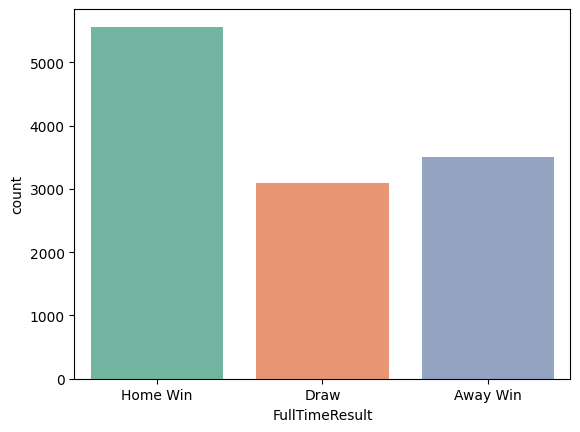

In [52]:
prem['FullTimeResult'] = prem['FullTimeResult'].map({'H':'Home Win', 'A':'Away Win', 'D':'Draw'})
sns.countplot(prem, x='FullTimeResult', palette='Set2', order=['Home Win', 'Draw', 'Away Win'])

## 🏟️ Home vs Away Performance

Let’s compare home and away wins across the dataset. Are home teams significantly more likely to win?

We'll also break down average goals scored by home and away teams.

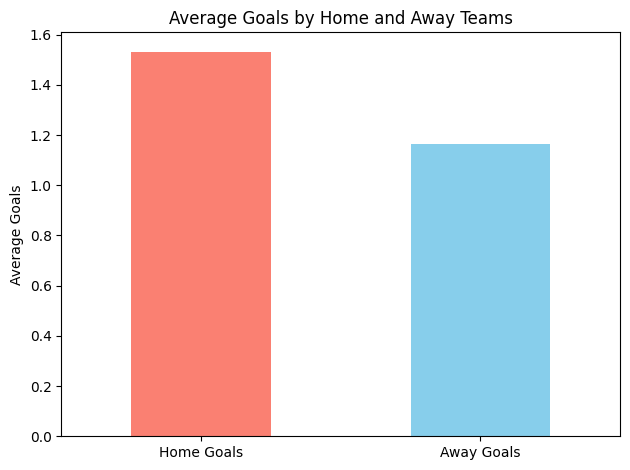

In [53]:
avg_goals = pd.Series({
    'Home Goals': prem['FullTimeHomeTeamGoals'].mean(),
    'Away Goals': prem['FullTimeAwayTeamGoals'].mean()
})

avg_goals.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Average Goals by Home and Away Teams')
plt.ylabel('Average Goals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 🎯 Goal Distributions

How many goals are typically scored in a match? Are 0–0 draws common? We'll plot:
- Goal difference distributions
- Breakdown of high-scoring vs low-scoring games

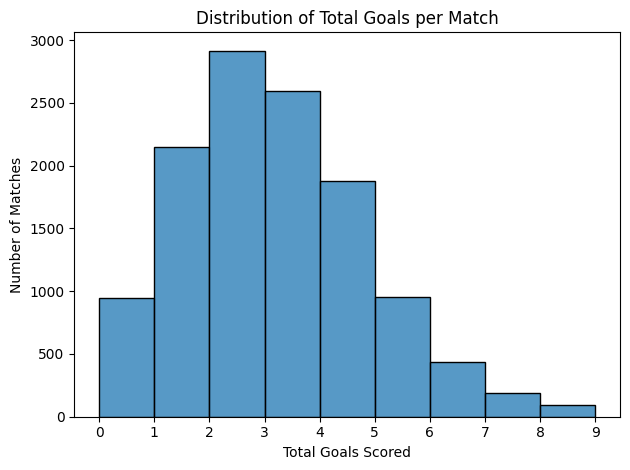

In [54]:
prem['TotalGoals'] = prem['FullTimeHomeTeamGoals'] + prem['FullTimeAwayTeamGoals']

sns.histplot(prem['TotalGoals'], bins=range(0, 10), kde=False)
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals Scored')
plt.ylabel('Number of Matches')
plt.xticks(range(0, 10))
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/2794724833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GoalDifference', data=prem, palette='Blues')


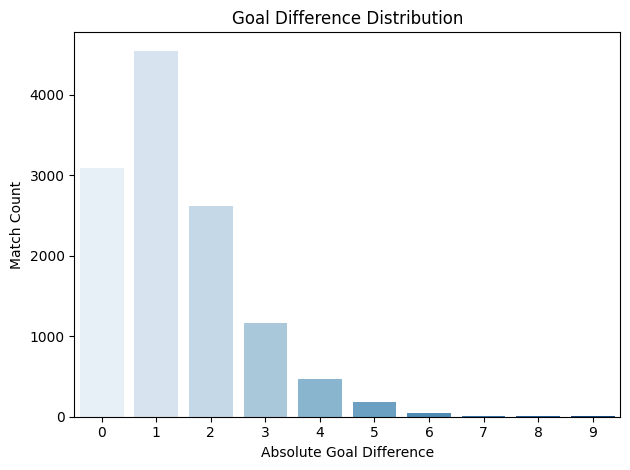

In [55]:
prem['GoalDifference'] = abs(prem['FullTimeHomeTeamGoals'] - prem['FullTimeAwayTeamGoals'])

sns.countplot(x='GoalDifference', data=prem, palette='Blues')
plt.title('Goal Difference Distribution')
plt.xlabel('Absolute Goal Difference')
plt.ylabel('Match Count')
plt.tight_layout()
plt.show()

In [56]:
zero_zero = prem[
    (prem['FullTimeHomeTeamGoals'] == 0) & 
    (prem['FullTimeAwayTeamGoals'] == 0)
]

share = len(zero_zero) / len(prem) * 100
print(f"0–0 draws account for {share:.2f}% of all matches.")

0–0 draws account for 7.80% of all matches.


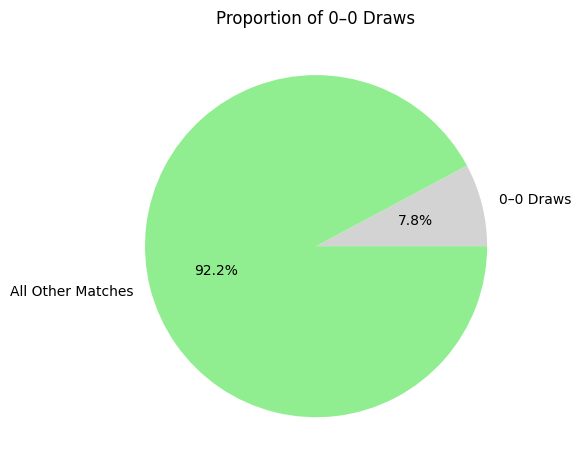

In [57]:
labels = ['0–0 Draws', 'All Other Matches']
sizes = [len(zero_zero), len(prem) - len(zero_zero)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgray', 'lightgreen'])
plt.title('Proportion of 0–0 Draws')
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/1427211714.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ScoringTier', data=prem, palette='Set3', order=['Low (0–1)', 'Medium (2–3)', 'High (4+)'])


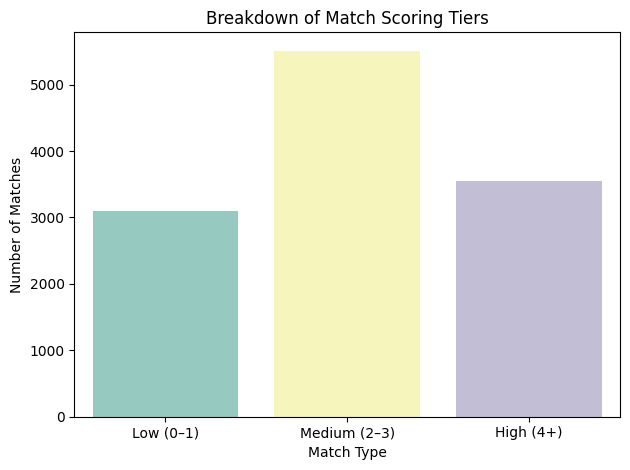

In [58]:
def goal_tier(g):
    if g <= 1:
        return 'Low (0–1)'
    elif g <= 3:
        return 'Medium (2–3)'
    else:
        return 'High (4+)'

prem['ScoringTier'] = prem['TotalGoals'].apply(goal_tier)

sns.countplot(x='ScoringTier', data=prem, palette='Set3', order=['Low (0–1)', 'Medium (2–3)', 'High (4+)'])
plt.title('Breakdown of Match Scoring Tiers')
plt.xlabel('Match Type')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

## 📅 Seasonal Trends

If time is included in the dataset, we can explore how certain trends shift by season:
- Goals per game over time
- Draw percentages per season
- Variability in team dominance

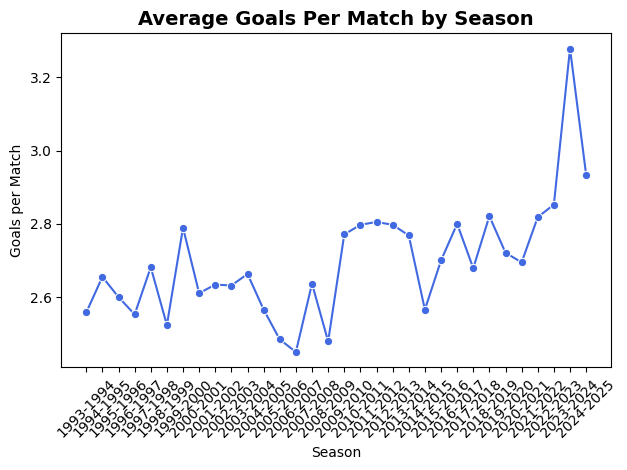

In [59]:
prem['TotalGoals'] = prem['FullTimeHomeTeamGoals'] + prem['FullTimeAwayTeamGoals']

season_goals = (
    prem.groupby('Season')['TotalGoals']
    .mean()
    .reset_index()
)

sns.lineplot(data=season_goals, x='Season', y='TotalGoals', marker='o', color='royalblue')
plt.title('Average Goals Per Match by Season', fontsize=14, weight='bold')
plt.ylabel('Goals per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/2728471486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


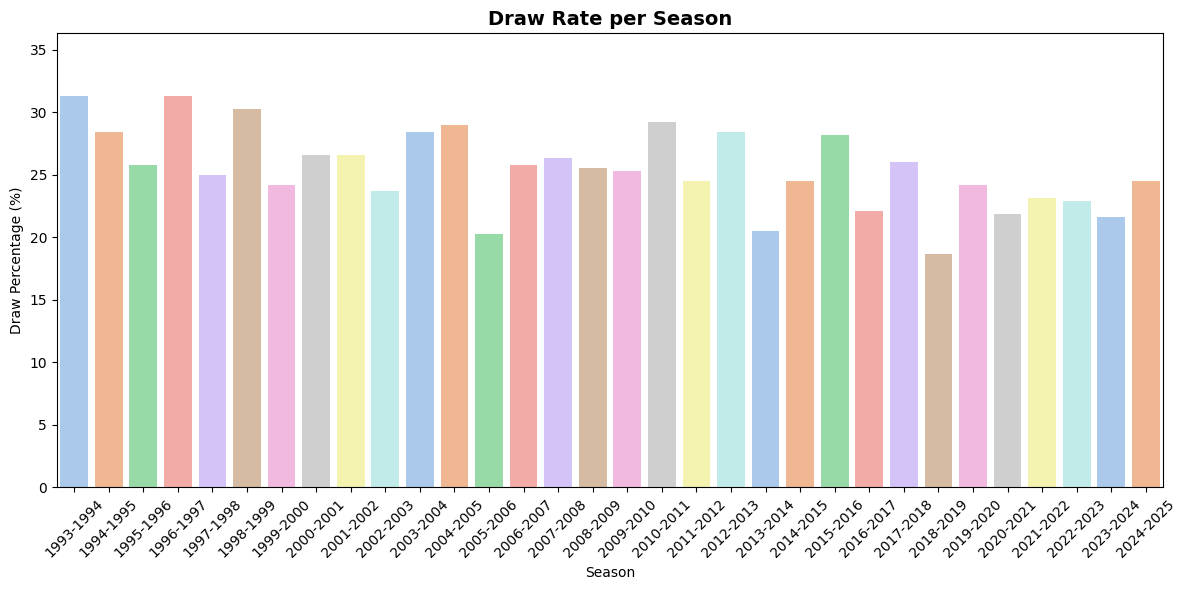

In [65]:
draw_pct = (
    prem.groupby('Season')['FullTimeResult']
    .apply(lambda x: (x == 'Draw').mean() * 100)
    .reset_index(name='DrawPercentage')
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=draw_pct,
    x='Season',
    y='DrawPercentage',
    palette='pastel'
)

plt.title('Draw Rate per Season', fontsize=14, weight='bold')
plt.ylabel('Draw Percentage (%)')
plt.xlabel('Season')
plt.ylim(0, draw_pct['DrawPercentage'].max() + 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/1698202300.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points = points.append(


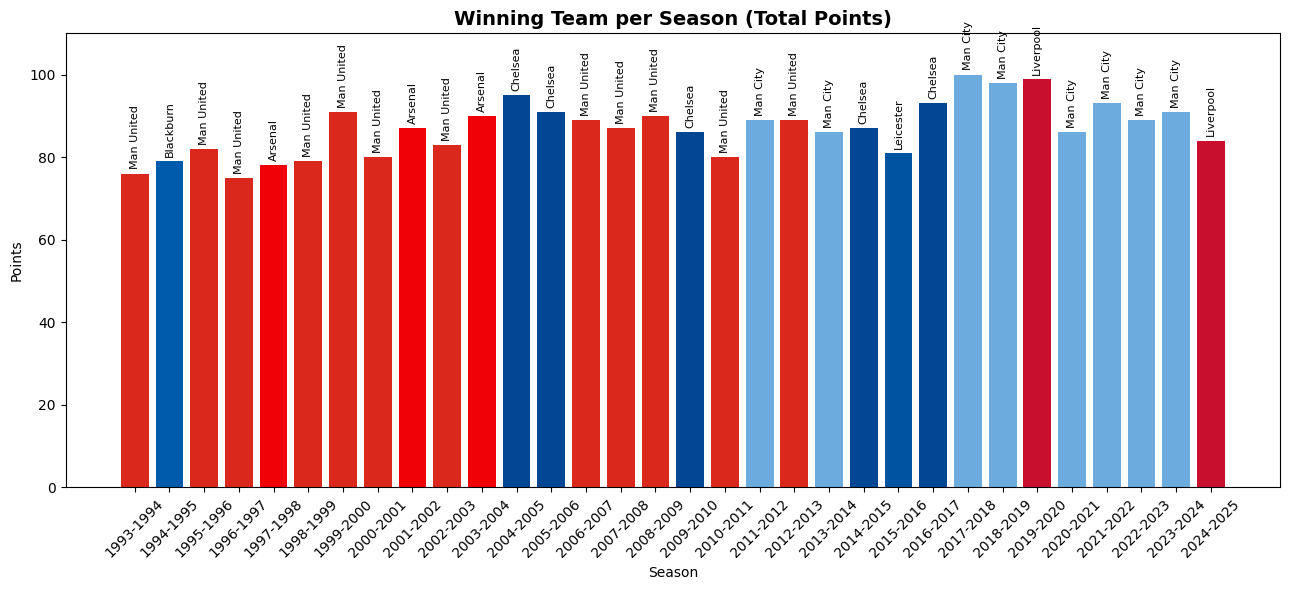

In [68]:
points = prem[['Season', 'HomeTeam', 'HomeTeamPoints']].rename(columns={'HomeTeam': 'Team', 'HomeTeamPoints': 'Points'})
points = points.append(
    prem[['Season', 'AwayTeam', 'AwayTeamPoints']].rename(columns={'AwayTeam': 'Team', 'AwayTeamPoints': 'Points'}),
    ignore_index=True
)

season_team_points = points.groupby(['Season', 'Team'])['Points'].sum().reset_index()

top_teams = (
    season_team_points
    .sort_values(['Season', 'Points'], ascending=[True, False])
    .groupby('Season')
    .head(1)
    .reset_index(drop=True)
)

team_colors = {
    'Man United': '#DA291C',
    'Arsenal': '#EF0107',
    'Chelsea': '#034694',
    'Man City': '#6CABDD',
    'Liverpool': '#C8102E',
    'Leicester': '#0053A0',
    'Blackburn': '#005BAC',
    'Leeds': '#FFCD00',
    'Newcastle': '#241F20',
    'Tottenham': '#132257',
    'Blackpool': '#FF6C00',
    'Everton': '#003399',
    'Aston Villa': '#95BFE5',
    'Wolves': '#FDB913',
    'Nottingham Forest': '#DD0000'
}

top_teams['Color'] = top_teams['Team'].map(team_colors).fillna('#999999')

plt.figure(figsize=(13, 6))
bars = plt.bar(top_teams['Season'], top_teams['Points'], color=top_teams['Color'])

plt.title('Winning Team per Season (Total Points)', fontsize=14, weight='bold')
plt.ylabel('Points')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylim(0, top_teams['Points'].max() + 10)
plt.tight_layout()

# Annotate bars with team name
for bar, team in zip(bars, top_teams['Team']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, team, ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()

## 🔢 Top & Bottom Teams

Which teams have consistently performed well or poorly?

We’ll look at:
- Average points per match
- Goal differentials
- Win/loss percentages

## 🧠 Key Takeaways

A summary of major patterns and surprising findings from the EDA — these insights can help guide model-building or deeper storytelling in future posts.

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/1421397503.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='AvgPointsPerMatch', y='Team', palette='coolwarm')


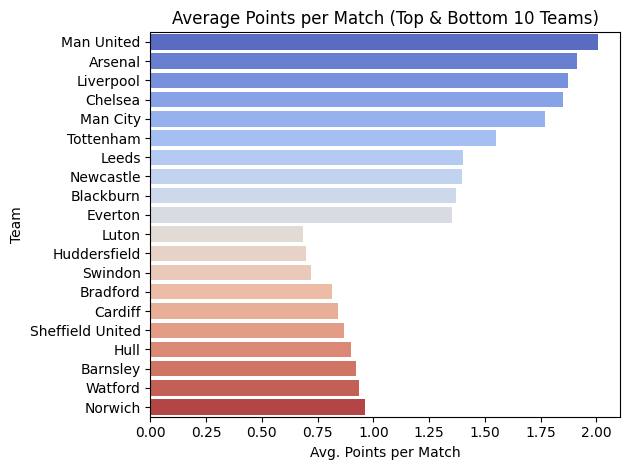

In [69]:
team_summary = points.groupby('Team').agg(
    TotalPoints=('Points', 'sum'),
    MatchesPlayed=('Points', 'count')
).reset_index()

team_summary['AvgPointsPerMatch'] = team_summary['TotalPoints'] / team_summary['MatchesPlayed']

top_bottom = pd.concat([
    team_summary.nlargest(10, 'AvgPointsPerMatch'),
    team_summary.nsmallest(10, 'AvgPointsPerMatch')
])

sns.barplot(data=top_bottom, x='AvgPointsPerMatch', y='Team', palette='coolwarm')
plt.title('Average Points per Match (Top & Bottom 10 Teams)')
plt.xlabel('Avg. Points per Match')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_49025/1269672334.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


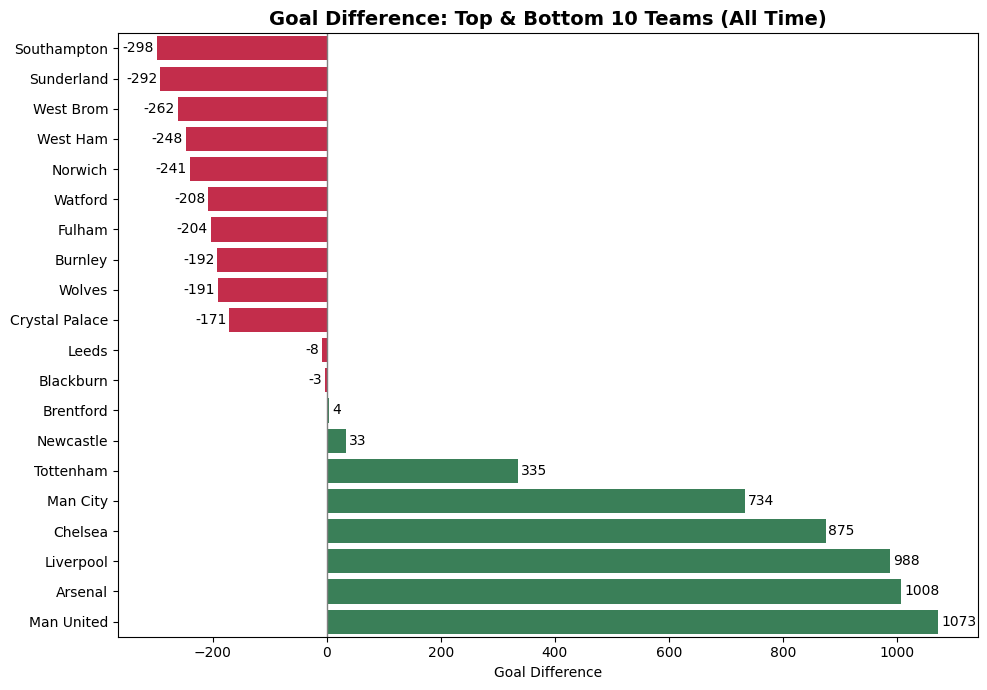

In [74]:
top_bottom_gd = pd.concat([
    goal_diff.nlargest(10, 'GoalDifference'),
    goal_diff.nsmallest(10, 'GoalDifference')
])

top_bottom_gd = top_bottom_gd.sort_values('GoalDifference')

# ✅ Convert Series to list here
colors = top_bottom_gd['GoalDifference'].apply(lambda x: 'crimson' if x < 0 else 'seagreen').tolist()

plt.figure(figsize=(10, 7))
sns.barplot(
    data=top_bottom_gd,
    x='GoalDifference',
    y='Team',
    palette=colors
)

plt.title('Goal Difference: Top & Bottom 10 Teams (All Time)', fontsize=14, weight='bold')
plt.xlabel('Goal Difference')
plt.ylabel('')
plt.axvline(0, color='gray', linewidth=1)

for i, row in enumerate(top_bottom_gd.itertuples()):
    plt.text(
        row.GoalDifference + (5 if row.GoalDifference >= 0 else -5),
        i,
        f"{int(row.GoalDifference)}",
        color='black',
        va='center',
        ha='left' if row.GoalDifference >= 0 else 'right'
    )

plt.tight_layout()
plt.show()